In [1]:
# add dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [2]:
# pull in dataframe
clean = pd.read_csv("cleaned_data.csv")

In [3]:
# determine how many countries are in data
clean["Country"].unique()

array(['France', 'Spain', 'Lithuania', 'United Kingdom', 'Germany',
       'Bulgaria', 'Denmark', 'Italy', 'Finland', 'Ireland', 'Belgium',
       'Sweden', 'Portugal', 'Czech Republic', 'Serbia', 'Romania',
       'Switzerland', 'Latvia', 'Austria', 'Luxembourg', 'Norway',
       'Croatia', 'Belarus'], dtype=object)

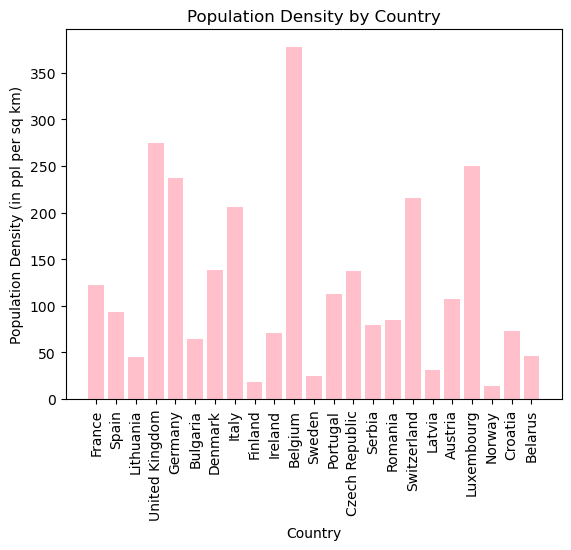

In [4]:
# population density numbers
x_axis = clean["Country"]
y_axis = clean["Population Density"]

plt.bar(x_axis, y_axis, color="pink", align="center")
plt.xticks(rotation=90)
plt.xlabel("Country")
plt.ylabel("Population Density (in ppl per sq km)")
plt.title("Population Density by Country")
plt.show()

In [5]:
# get mean dissolved oxygen per population density
oxy_data = clean.loc[clean["Unit of Measure"] == "mg{O2}/L", :]
oxy_country = oxy_data.set_index("Country").groupby(["Country"])
oxy_country_mean = oxy_country["Value"].mean()
oxy_popden = oxy_country["Population Density"].mean()
oxy_summary = pd.DataFrame({"Population Density": oxy_popden, "Avg Oxygen Levels (in mg{O2}/L)": oxy_country_mean,})
oxy_summary

,Population Density,Avg Oxygen Levels (in mg{O2}/L)
Country,,
Austria,107.127967,3.714332
Belarus,46.719504,1.070000
Belgium,377.379590,5.824079
Bulgaria,64.711100,7.863195
Croatia,73.049375,4.666667
Czech Republic,137.657705,8.975000
Denmark,137.976566,1.318566
Finland,18.148547,12.626858
France,122.299437,3.769420


The r-value is -0.31962474407524594


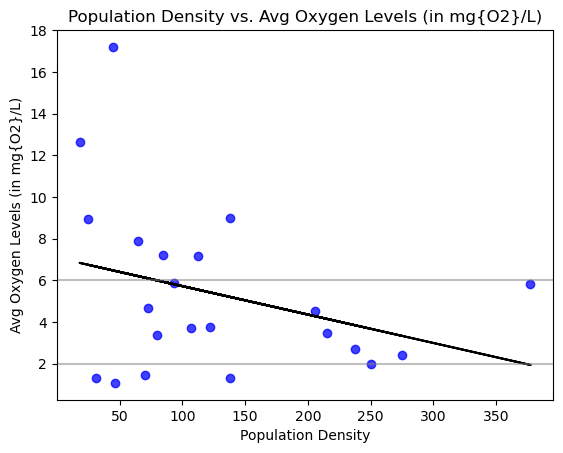

In [6]:
# plot dissolved oxygen vs population density
(slope, intercept,rvalue, pvalue, stderr) = st.linregress(oxy_summary["Population Density"],oxy_summary["Avg Oxygen Levels (in mg{O2}/L)"])
regress_oxyvalues = oxy_summary["Population Density"] * slope + intercept
line_eq = f"y = {round(slope, 2)} x + {round(intercept, 2)}"

#calculate rvalue
print(f"The r-value is {rvalue}")

#make scatterplot
x_axis = oxy_summary["Population Density"]
y_axis = oxy_summary["Avg Oxygen Levels (in mg{O2}/L)"]
plt.scatter(x_axis, y_axis, marker='o', facecolors='blue', edgecolors='blue', alpha=0.75)
plt.title('Population Density vs. Avg Oxygen Levels (in mg{O2}/L)')
plt.xlabel('Population Density')
plt.ylabel('Avg Oxygen Levels (in mg{O2}/L)')
plt.plot(oxy_summary["Population Density"], regress_oxyvalues, color="black")
plt.axhline(y=6, color="gray", linestyle="-", alpha=0.5)
plt.axhline(y=2, color='gray', linestyle='-', alpha=0.5)
plt.show()

In [7]:
# get mean temp per population density
temp_data = clean.loc[clean["Unit of Measure"] == "Cel", :]
temp_country = temp_data.set_index("Country").groupby(["Country"])
temp_country_mean = temp_country["Value"].mean()
temp_popden = temp_country["Population Density"].mean()
temp_country_mean
temp_summary = pd.DataFrame({"Population Density": temp_popden, "Avg Water Temp (in deg Celsius)": temp_country_mean,})
temp_summary

,Population Density,Avg Water Temp (in deg Celsius)
Country,,
Austria,107.127967,10.822500
Belgium,377.379590,11.623625
Bulgaria,64.711100,13.821118
Croatia,73.049375,12.800000
Finland,18.148547,9.736109
France,122.299437,12.083606
Germany,237.307597,12.326872
Ireland,70.653448,9.770577
Italy,205.418372,16.337430


The r-value is -0.02164696688836785


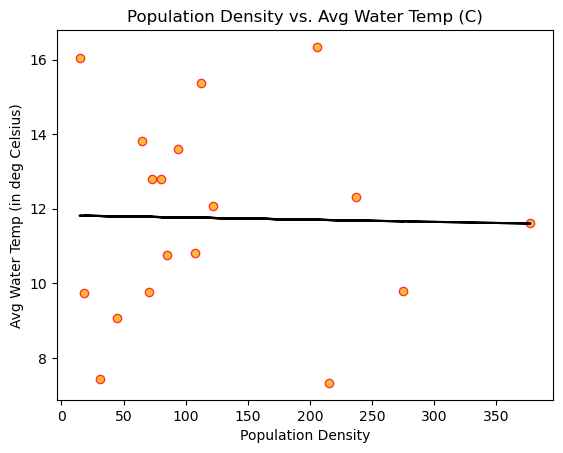

In [8]:
# plot mean water temp vs population density
(slope, intercept,rvalue, pvalue, stderr) = st.linregress(temp_summary["Population Density"],temp_summary["Avg Water Temp (in deg Celsius)"])
regress_tempvalues = temp_summary["Population Density"] * slope + intercept
line_eq = f"y = {round(slope, 2)} x + {round(intercept, 2)}"

#calculate rvalue
print(f"The r-value is {rvalue}")

#make scatterplot
x_axis = temp_summary["Population Density"]
y_axis = temp_summary["Avg Water Temp (in deg Celsius)"]
plt.scatter(x_axis, y_axis, marker='o', facecolors='orange', edgecolors='red', alpha=0.75)
plt.title('Population Density vs. Avg Water Temp (C)')
plt.xlabel('Population Density')
plt.ylabel('Avg Water Temp (in deg Celsius)')
plt.plot(temp_summary["Population Density"], regress_tempvalues, color="black")
plt.show()


In [9]:
# ph mean numbers
ph_data = clean.loc[clean["Unit of Measure"] == "[pH]", :]
ph_country = ph_data.set_index("Country").groupby(["Country"])
ph_country_mean = ph_country["Value"].mean()
ph_popden = ph_country["Population Density"].mean()
ph_country_mean
ph_summary = pd.DataFrame({"Population Density": ph_popden, "Avg Water pH": ph_country_mean,})
ph_summary

,Population Density,Avg Water pH
Country,,
Austria,107.127967,8.221665
Belgium,377.379590,7.771786
Bulgaria,64.711100,7.954444
Croatia,73.049375,7.900000
Finland,18.148547,6.745819
France,122.299437,7.751359
Germany,237.307597,7.827198
Ireland,70.653448,7.266670
Italy,205.418372,8.008182


The r-value is 0.35004121129185245


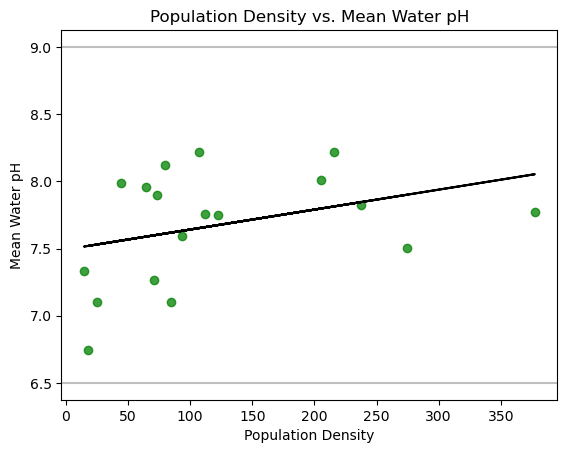

In [10]:
# create ph scatterplot vs population density
(slope, intercept,rvalue, pvalue, stderr) = st.linregress(ph_summary["Population Density"],ph_summary["Avg Water pH"])
regress_values = ph_summary["Population Density"] * slope + intercept
line_eq = f"y = {round(slope, 2)} x + {round(intercept, 2)}"

#calculate rvalue
print(f"The r-value is {rvalue}")

#make pH scatterplot
x_axis = ph_summary["Population Density"]
y_axis = ph_summary["Avg Water pH"]
plt.scatter(x_axis, y_axis, marker='o', facecolors='green', edgecolors='green', alpha=0.75)
plt.title('Population Density vs. Mean Water pH')
plt.xlabel('Population Density')
plt.ylabel('Mean Water pH')
plt.plot(ph_summary["Population Density"], regress_values, color="black")
plt.axhline(y=6.5, color="gray", linestyle="-", alpha=0.5)
plt.axhline(y=9, color="gray", linestyle="-", alpha=0.5)
plt.show()

In [11]:
# gdp
#GDP_format = france_water
#GDP_format = clean 
#GDP_format["GDP"] = GDP_format["GDP"].map("${:,.2f}".format)
#GDP_format


In [12]:
#  gdp
#year_format = france_water
#year_format = clean
#year_format["Year"] = year_format["Year"].map("{:.0f}".format)
#year_format


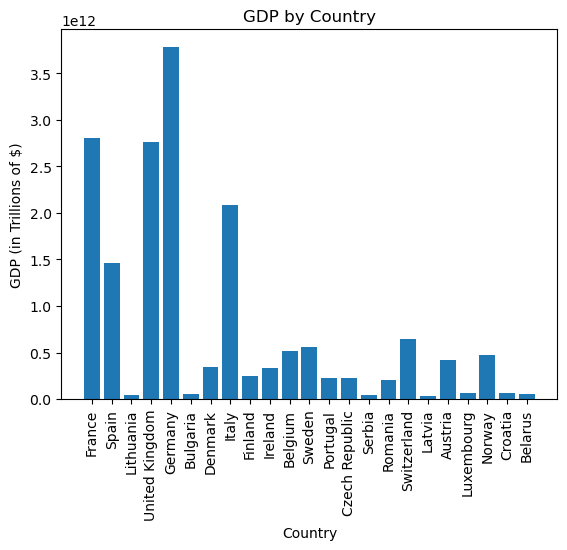

In [13]:
# gdp
import matplotlib.pyplot as plt
import numpy as np

plt.bar(clean["Country"], clean["GDP"]) #.map("${:,.2f}".format))

# Incorporate the other graph properties
plt.ylabel("GDP (in Trillions of $)")
plt.xlabel("Country")
#plt.title("GDP by Year in France")
plt.title("GDP by Country")
plt.xticks(rotation=90)
# Save the figure
#plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

In [14]:
#Create DF of Stats for Temp- all years combined for each country
Temp = clean['Unit of Measure'] == 'Cel'

Country_Temp_Stats = clean[Temp].groupby(['Country', 'GDP', 'Population Density']).agg({
    'Value': ['mean', 'median', 'var', 'std', 'sem']
}).reset_index()

# Rename columns
Country_Temp_Stats.columns = ['Country', 'GDP', 'Population Density', 'Mean Temp', 'Median Temp', 
                      'Temp Variance', 'Temp Std. Dev.', 'Temp Std. Err.']
Country_Temp_Stats

,Country,GDP,Population Density,Mean Temp,Median Temp,Temp Variance,Temp Std. Dev.,Temp Std. Err.
0,Austria,4.200405e+11,107.127967,10.822500,10.82250,3.112513,1.764231,1.247500
1,Belgium,5.151026e+11,377.379590,11.623625,11.65275,2.920474,1.708939,0.493328
2,Bulgaria,5.679241e+10,64.711100,13.821118,13.84000,6.332130,2.516372,0.431554
3,Croatia,6.109527e+10,73.049375,12.800000,12.80000,NaN,NaN,NaN
4,Finland,2.526922e+11,18.148547,9.736109,8.41035,30.836440,5.553057,0.981651
5,France,2.806036e+12,122.299437,12.083606,12.06250,3.286570,1.812890,0.083981
6,Germany,3.781699e+12,237.307597,12.326872,12.11670,5.030583,2.242896,0.320414
7,Ireland,3.323614e+11,70.653448,9.770577,9.85000,1.128405,1.062264,0.613299
8,Italy,2.080645e+12,205.418372,16.337430,15.84165,4.390951,2.095460,0.662642
9,Latvia,2.887150e+10,30.993471,7.440807,6.98571,7.964277,2.822105,1.066655


In [15]:
#Create DF of Stats for Dissolved O2 - all years combined for each country
O2 = clean['Unit of Measure'] == 'mg{O2}/L'

Country_O2_Stats = clean[O2].groupby(['Country', 'GDP', 'Population Density']).agg({
    'Value': ['mean', 'median', 'var', 'std', 'sem']
}).reset_index()

# Rename columns
Country_O2_Stats.columns = ['Country', 'GDP', 'Population Density', 'Mean O2', 'Median O2', 
                    'O2 Variance', 'O2 Std. Dev.', 'O2 Std. Err.']
Country_O2_Stats

,Country,GDP,Population Density,Mean O2,Median O2,O2 Variance,O2 Std. Dev.,O2 Std. Err.
0,Austria,4.200405e+11,107.127967,3.714332,3.23549,4.181804,2.044946,0.834846
1,Belarus,5.918702e+10,46.719504,1.070000,1.07000,NaN,NaN,NaN
2,Belgium,5.151026e+11,377.379590,5.824079,2.00000,62.172583,7.884959,1.858503
3,Bulgaria,5.679241e+10,64.711100,7.863195,3.68750,68.975917,8.305174,1.081242
4,Croatia,6.109527e+10,73.049375,4.666667,3.50000,10.943333,3.308071,1.909916
5,Czech Republic,2.313405e+11,137.657705,8.975000,3.65415,78.265335,8.846770,3.127805
6,Denmark,3.475197e+11,137.976566,1.318566,1.30169,0.132659,0.364224,0.097343
7,Finland,2.526922e+11,18.148547,12.626858,11.87500,54.154149,7.358950,1.443209
8,France,2.806036e+12,122.299437,3.769420,1.57727,29.186612,5.402463,0.201198
9,Germany,3.781699e+12,237.307597,2.702537,2.40150,3.147974,1.774253,0.273773


In [16]:
#Create DF of Stats for pH - all years combined for each country
pH = clean['Unit of Measure'] == '[pH]'

Country_pH_Stats = clean[pH].groupby(['Country', 'GDP', 'Population Density']).agg({
    'Value': ['mean', 'median', 'var', 'std', 'sem']
}).reset_index()

# Rename columns
Country_pH_Stats.columns = ['Country', 'GDP', 'Population Density', 'Mean pH', 'Median pH', 
                    'pH Variance', 'pH Std. Dev.', 'pH Std. Err.']
Country_pH_Stats

,Country,GDP,Population Density,Mean pH,Median pH,pH Variance,pH Std. Dev.,pH Std. Err.
0,Austria,4.200405e+11,107.127967,8.221665,8.221665,0.052271,0.228629,0.161665
1,Belgium,5.151026e+11,377.379590,7.771786,7.804650,0.050814,0.225419,0.053132
2,Bulgaria,5.679241e+10,64.711100,7.954444,7.941500,0.036645,0.191428,0.033840
3,Croatia,6.109527e+10,73.049375,7.900000,7.900000,NaN,NaN,NaN
4,Finland,2.526922e+11,18.148547,6.745819,6.794100,0.173389,0.416400,0.074788
5,France,2.806036e+12,122.299437,7.751359,7.865360,0.148905,0.385882,0.018130
6,Germany,3.781699e+12,237.307597,7.827198,7.871165,0.086703,0.294453,0.042501
7,Ireland,3.323614e+11,70.653448,7.266670,7.266670,NaN,NaN,NaN
8,Italy,2.080645e+12,205.418372,8.008182,7.887920,0.064217,0.253411,0.080136
9,Lithuania,4.573544e+10,44.723076,7.985885,8.020000,0.066950,0.258747,0.064687


In [17]:
def LinReg(x_data, y_data):
    slope, intercept, r, p, std_err=st.linregress(x_data, y_data)
    fit=slope*x_axis+intercept
    plt.plot(x_data, fit, '-', color='black', )
    line_eq = "y = " + str(round(slope*1000000000000,2)) + "x + " + str(round(intercept,2))
    print(f'The r-value is:{r}')

The r-value is:0.15332307101484619


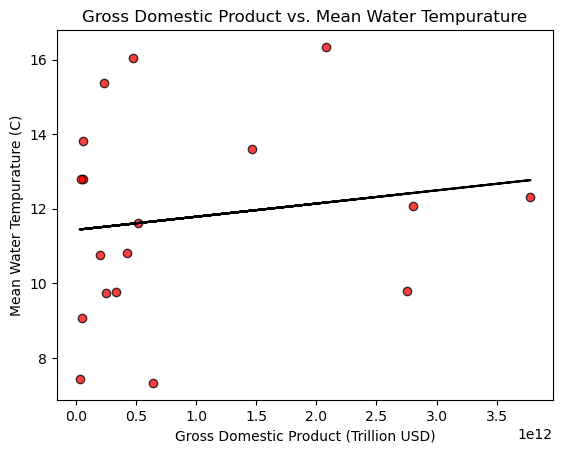

In [18]:
# Build scatter plot with regression line for GDP vs Mean Temp
x_axis=Country_Temp_Stats['GDP']
y_axis=Country_Temp_Stats['Mean Temp']
plt.scatter(x_axis, y_axis, marker='o', facecolors='red', edgecolors='black', alpha=0.75)
LinReg(x_axis, y_axis)
plt.title('Gross Domestic Product vs. Mean Water Tempurature')
plt.xlabel('Gross Domestic Product (Trillion USD)')
plt.ylabel('Mean Water Tempurature (C)')
# Save the figure
# plt.savefig("output_data/GDP_MeanTemp_ScatterRegression.png")
plt.show()

The r-value is:0.0738574309602054


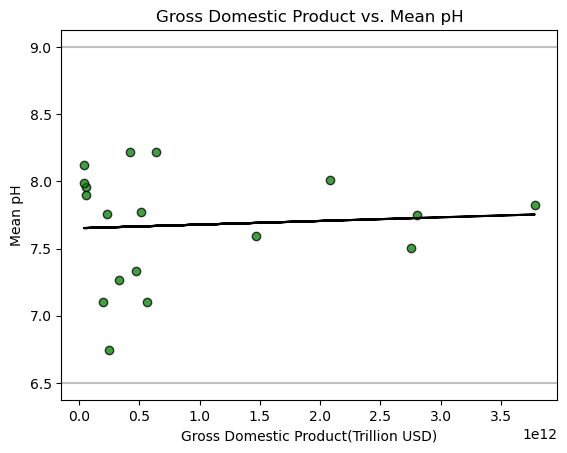

In [19]:
# Build scatter plot with regression line for GDP vs Mean pH
x_axis=Country_pH_Stats['GDP']
y_axis=Country_pH_Stats['Mean pH']
plt.axhline(y=6.5, color='gray', linestyle='-', alpha=0.5)
plt.axhline(y=9, color='gray', linestyle='-', alpha=0.5)
plt.scatter(x_axis, y_axis, marker='o', facecolors='green', edgecolors='black', alpha=0.75)
LinReg(x_axis, y_axis)
plt.title('Gross Domestic Product vs. Mean pH')
plt.xlabel('Gross Domestic Product(Trillion USD)')
plt.ylabel('Mean pH')
# Save the figure
# plt.savefig("output_data/GDP_MeanpH_ScatterRegression.png")
plt.show()

The r-value is:-0.24116504394765953


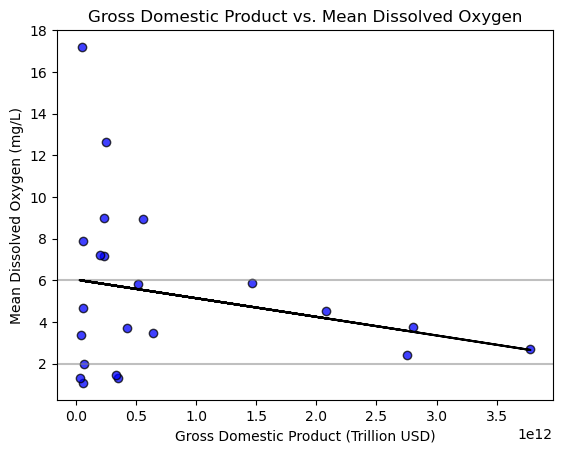

In [20]:
# Build scatter plot with regression line for GDP vs Dissolved 0xygen
x_axis=Country_O2_Stats['GDP']
y_axis=Country_O2_Stats['Mean O2']
plt.axhline(y=6, color='gray', linestyle='-', alpha=0.5)
plt.axhline(y=2, color='gray', linestyle='-', alpha=0.5)
plt.scatter(x_axis, y_axis, marker='o', facecolors='blue', edgecolors='black', alpha=0.75)
LinReg(x_axis, y_axis)
plt.title('Gross Domestic Product vs. Mean Dissolved Oxygen')
plt.xlabel('Gross Domestic Product (Trillion USD)')
plt.ylabel('Mean Dissolved Oxygen (mg/L)')
# Save the figure
# plt.savefig("output_data/GDP_MeanO2_ScatterRegression.png")
plt.show()